In [1]:
%reload_ext autoreload
%autoreload 2

from glob import glob
import numpy as np

import scipy
from scipy.interpolate import CubicSpline
#from scipy import integrate
import matplotlib.pyplot as plt
import sys
sys.path.append("../../../../dqmc_edit/thermaltest/Determinant-QMC/util/")
import util
import maxent
import matplotlib.ticker as ticker
plt.rcParams["figure.facecolor"] = 'w'
plt.rcParams.update({'font.size': 14, 'font.sans-serif':'Liberation Sans'})

from IPython.display import display_html
display_html("""<button onclick="$('.input, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


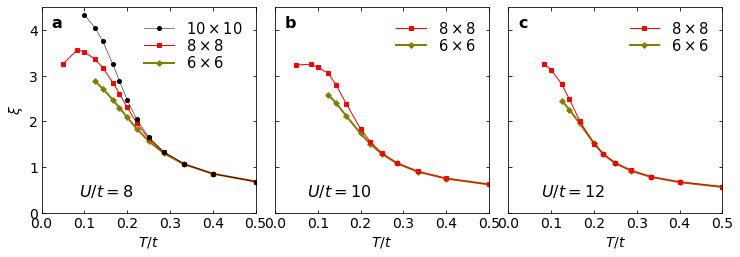

In [2]:
cmap = plt.cm.coolwarm
colorlist=['olive','r','k']
symbols = ['D','s','o']
f, axs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12.2,3.8))
plt.subplots_adjust(wspace=0.09, hspace=0.03)
axs[0].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[1].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[2].tick_params(direction='in',bottom=True, top=True, left=True, right=True)

z0U8=None
zU8=None
axs[0].set_xlabel(r"$T/t$")
axs[1].set_xlabel(r"$T/t$")
axs[2].set_xlabel(r"$T/t$")

U=8
sitex = 6
sitey = 6
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU8_66 = np.array([2,2.5,3,3.5,4,4.5,5,5.5,6,7,8])
axs[0].plot(1/betasU8_66,xi,lw=2, ms=4,color=colorlist[0],marker=symbols[0], linestyle='solid', label=rf'$6 \times 6$'
           )

U=8
sitex = 8
sitey = 8
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU8_88 = np.array([0.125,0.25,0.3,0.4,0.5,0.6,0.7,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,7,8,10,12,20])
axs[0].plot(1/betasU8_88,xi,lw=1, ms=4,color=colorlist[1],marker=symbols[1], linestyle='solid', label=rf'$8 \times 8$'
           )


U=8
sitex = 10
sitey = 10
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU8_1010 = np.array([2,2.5,3,3.5,4,4.5,5,5.5,6,7,8,10])
axs[0].plot(1/betasU8_1010,xi,lw=0.5, ms=4,color=colorlist[2],marker=symbols[2], linestyle='solid', label=rf'$10 \times 10$'
           )



U=10
sitex = 6
sitey = 6
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU10_66 = np.array([2,2.5,3,3.5,4,4.5,5,6,7,8])
axs[1].plot(1/betasU10_66,xi,lw=2, ms=4,color=colorlist[0],marker=symbols[0], linestyle='solid', label=rf'$6 \times 6$'
           )

U=10
sitex = 8
sitey = 8
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU10_88 = np.array([0.125,0.25,0.3,0.4,0.5,0.6,0.7,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,10,12,20])
axs[1].plot(1/betasU10_88,xi,lw=1, ms=4,color=colorlist[1],marker=symbols[1], linestyle='solid', label=rf'$8 \times 8$'
           )



U=12
sitex = 6
sitey = 6
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU12_66 = np.array([2,2.5,3,3.5,4,4.5,5,6,7,8])
axs[2].plot(1/betasU12_66,xi,lw=2, ms=4,color=colorlist[0],marker=symbols[0], linestyle='solid', label=rf'$6 \times 6$'
           )

U=12
sitex = 8
sitey = 8
tp = 0
zU8=None


xi = np.load(f'../calculation/correlationlength_{sitex:g}*{sitey:g}U{U:g}_tp{tp:g}.npy')
betasU12_88 = np.array([0.125,0.25,0.3,0.4,0.5,0.6,0.7,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,10,12])
axs[2].plot(1/betasU12_88,xi,lw=1, ms=4,color=colorlist[1],marker=symbols[1], linestyle='solid', label=rf'$8 \times 8$'
           )

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[::-1], labels[::-1], frameon=False,labelspacing=0.1,fontsize=14.8)

handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles[::-1], labels[::-1],frameon=False,labelspacing=0.1,fontsize=14.8)

handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(handles[::-1], labels[::-1],frameon=False,labelspacing=0.1,fontsize=14.8)

axs[0].set_xlim(0,0.5)
axs[0].set_ylim(0,4.5)
axs[0].set_ylabel(r'$\xi$')

axs[0].text(0.3,0.08,r"$U/t=8$", size=16, horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.3,0.08,r"$U/t=10$", size=16, horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.3,0.08,r"$U/t=12$", size=16, horizontalalignment='center',transform=axs[2].transAxes)

axs[0].text(0.07,0.9,"a", size=16, weight='bold',horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.07,0.9,"b", size=16, weight='bold',horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.07,0.9,"c", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)
plt.savefig("plots/fig_correlation_length.pdf",bbox_inches = 'tight',pad_inches=0.02,dpi=1000)
plt.show()